<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [3]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [5]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey_data_clean.csv")

# Display the first few rows of the data to understand its structure
df.head()


'wget' is not recognized as an internal or external command,
operable program or batch file.


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,86155.287263,Unknown,Unknown,86155.287263,Unknown
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.000000,Unknown,Unknown,86155.287263,Unknown
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,86155.287263,Appropriate in length,Easy,86155.287263,Unknown
3,4,I am learning to code,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,86155.287263,Too long,Easy,86155.287263,Unknown
4,5,I am a developer by profession,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,86155.287263,Too short,Easy,86155.287263,Unknown


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


In [51]:
df['Age'].value_counts()

Age
25-34 years old       23911
35-44 years old       14942
18-24 years old       14098
45-54 years old        6249
55-64 years old        2575
Under 18 years old     2568
65 years or older       772
Prefer not to say       322
Name: count, dtype: int64

In [53]:
df['SOPartFreq'].value_counts()

SOPartFreq
Less than once per month or monthly                   24162
I have never participated in Q&A on Stack Overflow    11143
A few times per month or weekly                        6277
A few times per week                                   2278
Daily or almost daily                                   936
Multiple times per day                                  441
Name: count, dtype: int64

In [55]:
df['JobSat'].value_counts()

JobSat
8.0     7509
7.0     6379
6.0     3751
9.0     3626
10.0    2251
5.0     1956
3.0     1165
4.0     1130
2.0      772
0.0      311
1.0      276
Name: count, dtype: int64

C:\Users\serge\AppData\Local\Temp\ipykernel_5744\3520850812.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Size'] = df_clean['JobSat'].astype(float) * 100


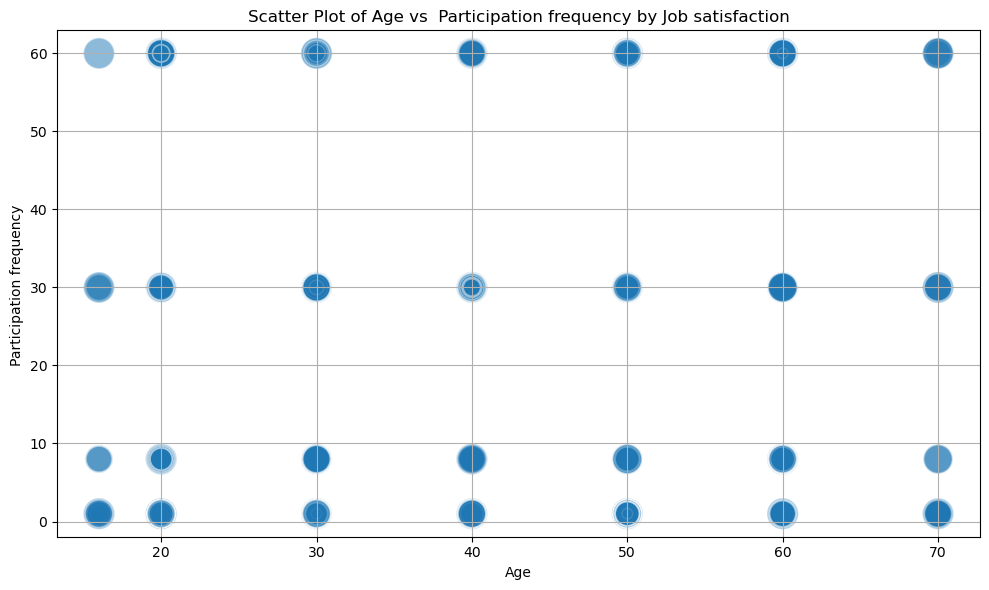

In [71]:
# age x SOPartFreq

# size - JobSat

import matplotlib.pyplot as plt
import seaborn as sns

age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 20,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
}
df['AgeNumeric'] = df['Age'].map(age_map)

freq_map = {
    'I have never participated in Q&A on Stack Overflow ': 0,
    'Less than once per month or monthly': 1,
    'A few times per month or weekly ': 4,
    'A few times per week': 8,
    'Daily or almost daily': 30,
    'Multiple times per day': 60,

}
df['FreqNumeric'] = df['SOPartFreq'].map(freq_map)



# Ensure both columns are numeric
df['AgeNumeric'] = pd.to_numeric(df['AgeNumeric'], errors='coerce')
df['FreqNumeric'] = pd.to_numeric(df['FreqNumeric'], errors='coerce')
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')


# Drop rows with missing CompTotal or Age
df_clean = df.dropna(subset=['AgeNumeric', 'SOPartFreq','JobSat'])

# Normalize size (optional: adjust multiplier for better visual scaling)
df_clean['Size'] = df_clean['JobSat'].astype(float) * 100

# Sample DataFrame (replace with your actual df)
# Let's assume 'Age' and 'CompTotal' are numeric
# sns.scatterplot(data=df, x='ConvertedCompYearly', y='JobSatPoints_6', alpha=0.6)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='AgeNumeric', y='FreqNumeric', size='Size', sizes=(10, 500), alpha=0.5, legend=False)


import matplotlib.ticker as ticker 
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))



# Add titles and labels
plt.title("Scatter Plot of Age vs  Participation frequency by Job satisfaction")
plt.xlabel("Age")
plt.ylabel("Participation frequency ")
plt.grid(True)
plt.tight_layout()
plt.show()


In [7]:
df['ConvertedCompYearly'].value_counts()

ConvertedCompYearly
86155.287263     42002
64444.000000       321
53703.000000       308
75184.000000       230
85925.000000       226
                 ...  
46145.000000         1
154440.000000        1
27391.000000         1
11562.000000         1
116844.000000        1
Name: count, Length: 6114, dtype: int64

#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


C:\Users\serge\AppData\Local\Temp\ipykernel_11848\4020821800.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Size'] = df_clean['AgeNumeric'].astype(float) * 100


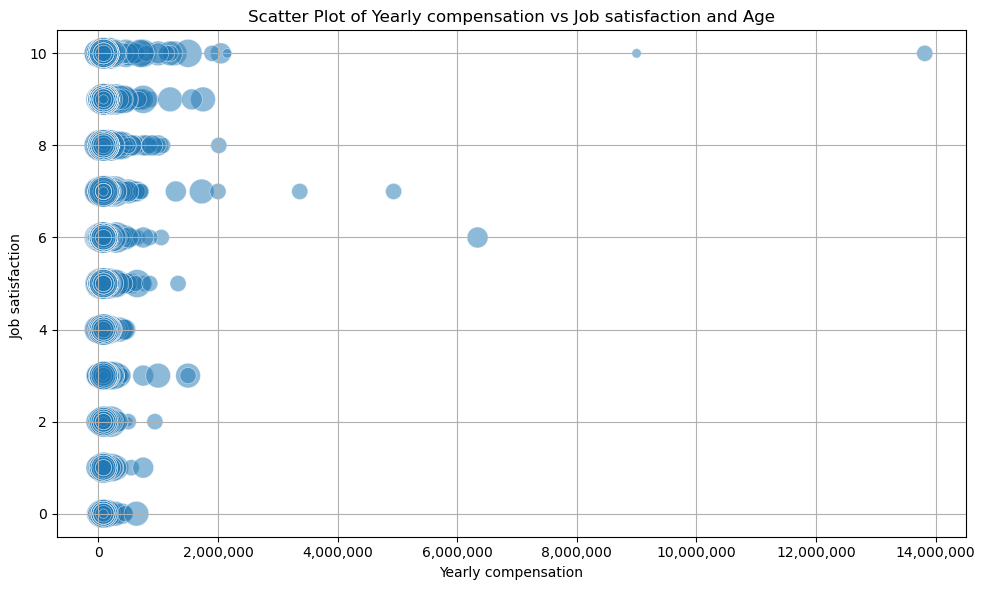

In [9]:
# X = ConvertedCompYearly , Y = JobSat

# size - Age 

import matplotlib.pyplot as plt
import seaborn as sns

age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 20,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
}
df['AgeNumeric'] = df['Age'].map(age_map)


# Ensure both columns are numeric

df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')
df['AgeNumeric'] = pd.to_numeric(df['AgeNumeric'], errors='coerce')


# Drop rows with missing CompTotal or Age
df_clean = df.dropna(subset=['ConvertedCompYearly','JobSat','AgeNumeric'])

# Normalize size (optional: adjust multiplier for better visual scaling)
df_clean['Size'] = df_clean['AgeNumeric'].astype(float) * 100

# Sample DataFrame (replace with your actual df)
# Let's assume 'Age' and 'CompTotal' are numeric
# sns.scatterplot(data=df, x='ConvertedCompYearly', y='JobSatPoints_6', alpha=0.6)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='ConvertedCompYearly', y='JobSat', size='Size', sizes=(10, 500), alpha=0.5, legend=False)


import matplotlib.ticker as ticker 
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))



# Add titles and labels
plt.title("Scatter Plot of Yearly compensation vs Job satisfaction and Age")
plt.xlabel("Yearly compensation")
plt.ylabel("Job satisfaction ")
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



✅ 4. Know the Return Type of Common Methods
Method	Returns
df['col']	Series
df[['col1', 'col2']]	DataFrame
df.groupby()	GroupBy object
.agg(), .sum(), .mean()	Usually DataFrame
.size()	Series
.value_counts()	Series
.reset_index()	DataFrame

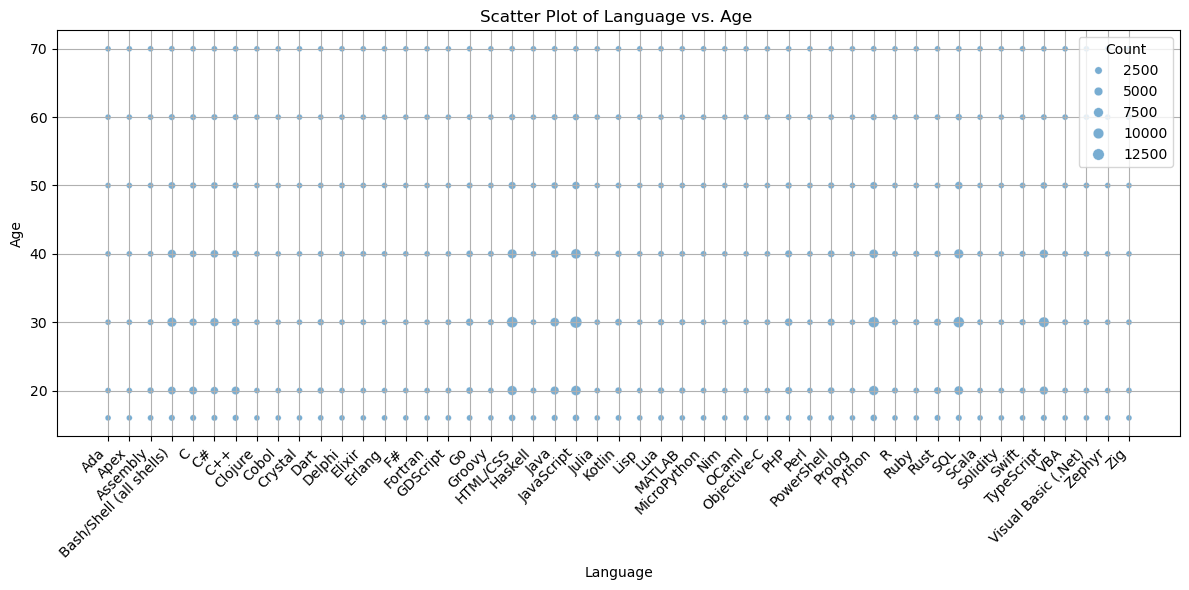

In [25]:

age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 20,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
}
df['AgeNumeric'] = df['Age'].map(age_map)





# Drop rows where LanguageHaveWorkedWith is NaN
df_clean = df.dropna(subset=['LanguageHaveWorkedWith']).copy()

# Convert semicolon-separated strings to lists
df_clean['Language'] = df_clean['LanguageHaveWorkedWith'].str.split(';')

# Explode the lists into individual rows and reset index
df_clean = df_clean.explode('Language').reset_index(drop=True)

# Strip whitespace
df_clean['Language'] = df_clean['Language'].str.strip()

# Optional: drop rows with missing JobSatPoints_6 (to prevent plot issues)
df_clean = df_clean.dropna(subset=['AgeNumeric'])



# Group by language and age to count frequency
language_age_counts = df_clean.groupby(['Language', 'AgeNumeric']).size().reset_index(name='Count')

# language_age_counts.head()

# Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=language_age_counts, x='Language', y='AgeNumeric', size ='Count', alpha=0.6)

plt.title("Scatter Plot of Language vs. Age ")
plt.xlabel("Language")
plt.ylabel("Age")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


In [29]:
df['DatabaseWantToWorkWith'].value_counts()

DatabaseWantToWorkWith
PostgreSQL                                                                                                                                                         3738
PostgreSQL;SQLite                                                                                                                                                  1533
SQLite                                                                                                                                                             1476
Microsoft SQL Server                                                                                                                                               1431
MySQL                                                                                                                                                              1139
                                                                                                                                         

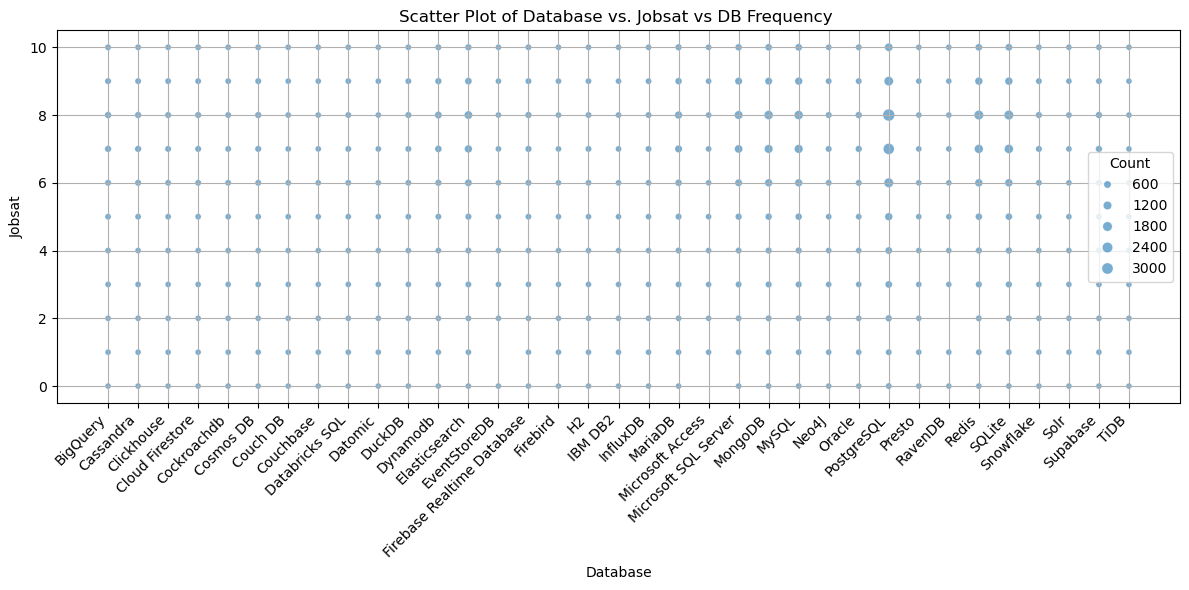

In [35]:
# x = DatabaseWantToWorkWith
# y = JobSat
# size = number of respondents for each database


# Drop rows where LanguageHaveWorkedWith is NaN
df_clean = df.dropna(subset=['DatabaseWantToWorkWith']).copy()

# Convert semicolon-separated strings to lists
df_clean['Database'] = df_clean['DatabaseWantToWorkWith'].str.split(';')

# Explode the lists into individual rows and reset index
df_clean = df_clean.explode('Database').reset_index(drop=True)

# Strip whitespace
df_clean['Database'] = df_clean['Database'].str.strip()

# Optional: drop rows with missing data (to prevent plot issues)
df_clean = df_clean.dropna(subset=['Database','JobSat'])



# Group by language and age to count frequency
Database_Jobsat_counts = df_clean.groupby(['Database', 'JobSat']).size().reset_index(name='Count')

# language_age_counts.head()

# Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=Database_Jobsat_counts, x='Database', y='JobSat', size ='Count', alpha=0.6)

plt.title("Scatter Plot of Database vs. Jobsat vs DB Frequency ")
plt.xlabel("Database")
plt.ylabel("Jobsat")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


In [ ]:
##Write your code here

X = DevType
Y = ConvertedCompYearly
Size = JobSat



In [37]:
df['DevType'].value_counts()

DevType
Developer, full-stack                            18260
Developer, back-end                               9928
Student                                           5102
Developer, front-end                              3349
Developer, desktop or enterprise applications     2493
Other (please specify):                           2458
Developer, mobile                                 2021
Developer, embedded applications or devices       1623
Engineering manager                               1275
Academic researcher                               1238
Data engineer                                     1118
Data scientist or machine learning specialist     1024
DevOps specialist                                 1019
Research & Development role                        943
Senior Executive (C-Suite, VP, etc.)               837
Developer, game or graphics                        706
Cloud infrastructure engineer                      634
System administrator                               552
De

In [41]:
df['ConvertedCompYearly'].value_counts()

ConvertedCompYearly
86155.287263     42002
64444.000000       321
53703.000000       308
75184.000000       230
85925.000000       226
                 ...  
46145.000000         1
154440.000000        1
27391.000000         1
11562.000000         1
116844.000000        1
Name: count, Length: 6114, dtype: int64

In [43]:
df['JobSat'].value_counts()

JobSat
8.0     7509
7.0     6379
6.0     3751
9.0     3626
10.0    2251
5.0     1956
3.0     1165
4.0     1130
2.0      772
0.0      311
1.0      276
Name: count, dtype: int64

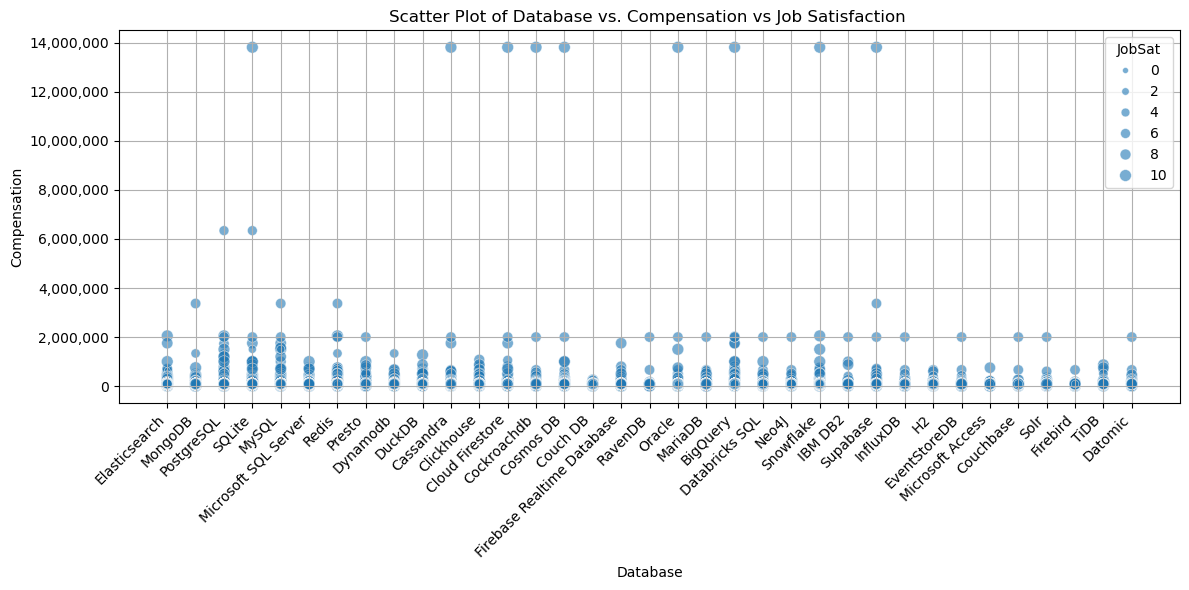

In [57]:
# X = DevType
# Y = ConvertedCompYearly
# Size = JobSat

import matplotlib.ticker as ticker 

# # Drop rows where LanguageHaveWorkedWith is NaN
# df_clean = df.dropna(subset=['DatabaseWantToWorkWith']).copy()

# # Convert semicolon-separated strings to lists
# df_clean['Database'] = df_clean['DatabaseWantToWorkWith'].str.split(';')

# # Explode the lists into individual rows and reset index
# df_clean = df_clean.explode('Database').reset_index(drop=True)

# # Strip whitespace
# df_clean['Database'] = df_clean['Database'].str.strip()

# Optional: drop rows with missing data (to prevent plot issues)
df_clean = df_clean.dropna(subset=['DevType','ConvertedCompYearly','JobSat'])



# Group by language and age to count frequency
# DevType_Jobsat_counts = df_clean.groupby(['DevType', 'JobSat']).size().reset_index(name='Count')

# language_age_counts.head()




# Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_clean, x='Database', y='ConvertedCompYearly', size ='JobSat', alpha=0.6)

plt.title("Scatter Plot of Database vs. Compensation vs Job Satisfaction ")
plt.xlabel("Database")
plt.ylabel("Compensation")
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.grid(True)
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


In [59]:
# Tools

df['NEWCollabToolsHaveWorkedWith'].value_counts()

NEWCollabToolsHaveWorkedWith
Visual Studio Code                                                                                                                                         6154
Visual Studio;Visual Studio Code                                                                                                                           2546
Notepad++;Visual Studio;Visual Studio Code                                                                                                                 1543
IntelliJ IDEA;Visual Studio Code                                                                                                                           1169
Vim;Visual Studio Code                                                                                                                                     1045
                                                                                                                                                           ... 
CLion;DataG

In [61]:
df['Age'].value_counts()

Age
25-34 years old       23911
35-44 years old       14942
18-24 years old       14098
45-54 years old        6249
55-64 years old        2575
Under 18 years old     2568
65 years or older       772
Prefer not to say       322
Name: count, dtype: int64

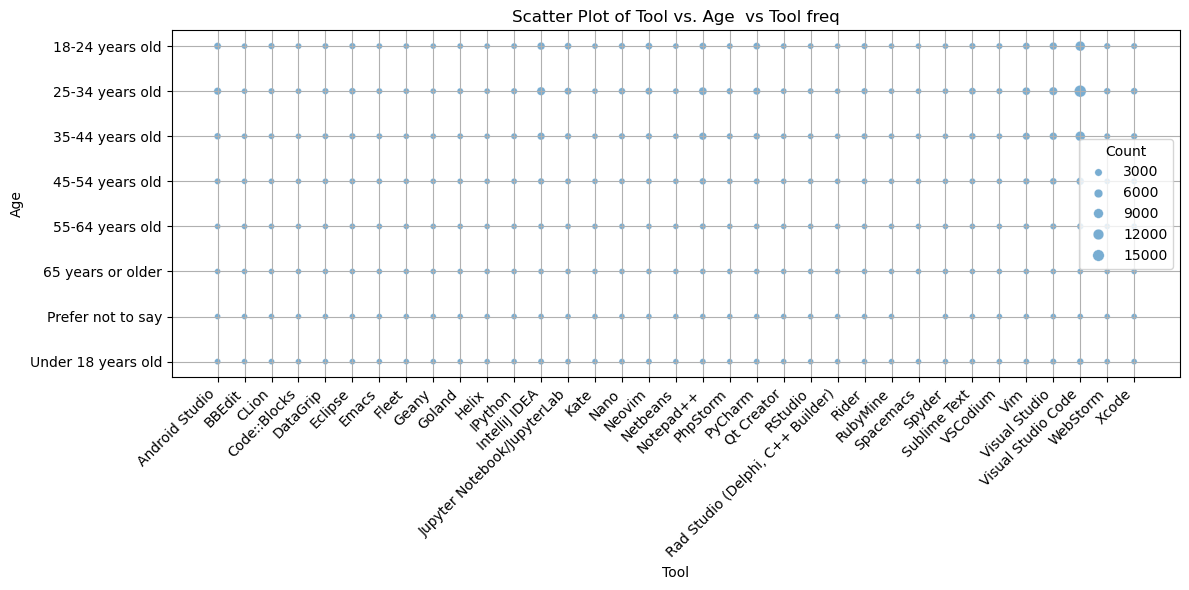

In [67]:
# X = NEWCollabToolsHaveWorkedWith
# Y  = Age
# size  = NEWCollabToolsHaveWorkedWith frequency


# age_map = {
#     'Under 18 years old': 16,
#     '18-24 years old': 20,
#     '25-34 years old': 30,
#     '35-44 years old': 40,
#     '45-54 years old': 50,
#     '55-64 years old': 60,
#     '65 years or older': 70,
# }
# df['AgeNumeric'] = df['Age'].map(age_map)





# Drop rows where LanguageHaveWorkedWith is NaN
df_clean = df.dropna(subset=['NEWCollabToolsHaveWorkedWith']).copy()

# Convert semicolon-separated strings to lists
df_clean['Tool'] = df_clean['NEWCollabToolsHaveWorkedWith'].str.split(';')

# Explode the lists into individual rows and reset index
df_clean = df_clean.explode('Tool').reset_index(drop=True)

# Strip whitespace
df_clean['Tool'] = df_clean['Tool'].str.strip()

# Optional: drop rows with missing JobSatPoints_6 (to prevent plot issues)
df_clean = df_clean.dropna(subset=['Age'])



# Group by language and age to count frequency
Tool_age_counts = df_clean.groupby(['Tool', 'Age']).size().reset_index(name='Count')

# language_age_counts.head()

# Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=Tool_age_counts, x='Tool', y='Age', size ='Count', alpha=0.6)

plt.title("Scatter Plot of Tool vs. Age  vs Tool freq")
plt.xlabel("Tool")
plt.ylabel("Age")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()






### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



In [7]:
df['WebframeWantToWorkWith'].value_counts()

WebframeWantToWorkWith
React                                                                                               997
Spring Boot                                                                                         950
Node.js                                                                                             619
ASP.NET CORE                                                                                        607
FastAPI                                                                                             576
                                                                                                   ... 
Angular;AngularJS;ASP.NET;Blazor;Node.js;React;Svelte                                                 1
Express;React;Spring Boot;Strapi                                                                      1
Django;Express;Laravel;React                                                                          1
Deno;Fastify;Svelte                      

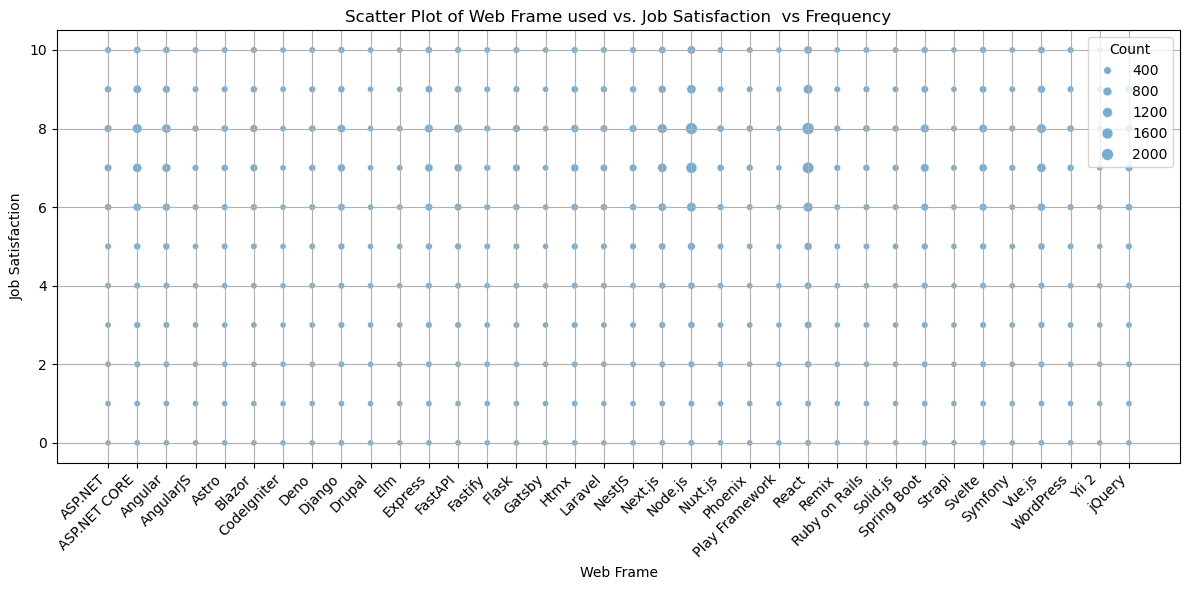

In [23]:
# X = WebframeWantToWorkWith
# Y = JobSat
# Size = number of respondents ( count frequency)
import seaborn as sns

# Drop rows where WebframeWantToWorkWith is NaN
df_clean = df.dropna(subset=['WebframeWantToWorkWith']).copy()

# Convert semicolon-separated strings to lists
df_clean['Web_Frame'] = df_clean['WebframeWantToWorkWith'].str.split(';')

# Explode the lists into individual rows and reset index
df_clean = df_clean.explode('Web_Frame').reset_index(drop=True)

# Strip whitespace
df_clean['Web_Frame'] = df_clean['Web_Frame'].str.strip()

# Optional: drop rows with missing Job Sat(to prevent plot issues)
df_clean = df_clean.dropna(subset=['JobSat'])

# Ensure JobSat is munerical: 
df_clean['JobSat'] = pd.to_numeric(df_clean['JobSat'], errors='coerce')


# Group by Web Frames and Job sat to count frequency
Counts = df_clean.groupby(['Web_Frame', 'JobSat']).size().reset_index(name='Count')

# language_age_counts.head()

# Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=Counts, x='Web_Frame', y='JobSat', size ='Count', alpha=0.6)

plt.title("Scatter Plot of Web Frame used vs. Job Satisfaction  vs Frequency")
plt.xlabel("Web Frame")
plt.ylabel("Job Satisfaction")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()




#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



In [ ]:
X = LanguageAdmired
Y = Country
size = frequency of admiration



In [25]:
df['LanguageAdmired'].value_counts()

LanguageAdmired
Python                                                                                         1555
HTML/CSS;JavaScript;TypeScript                                                                 1058
C#                                                                                              892
Python;SQL                                                                                      669
Java                                                                                            583
                                                                                               ... 
Bash/Shell (all shells);C;HTML/CSS;Java;Lisp;Perl;Python                                          1
C#;Dart;Go;JavaScript;Python                                                                      1
JavaScript;PHP;Rust;SQL;TypeScript                                                                1
Cobol;SQL;VBA                                                                       

In [27]:
df['Country'].value_counts()

Country
United States of America                                11095
Germany                                                  4947
India                                                    4231
United Kingdom of Great Britain and Northern Ireland     3224
Ukraine                                                  2672
                                                        ...  
Central African Republic                                    1
Equatorial Guinea                                           1
Niger                                                       1
Guinea                                                      1
Solomon Islands                                             1
Name: count, Length: 185, dtype: int64

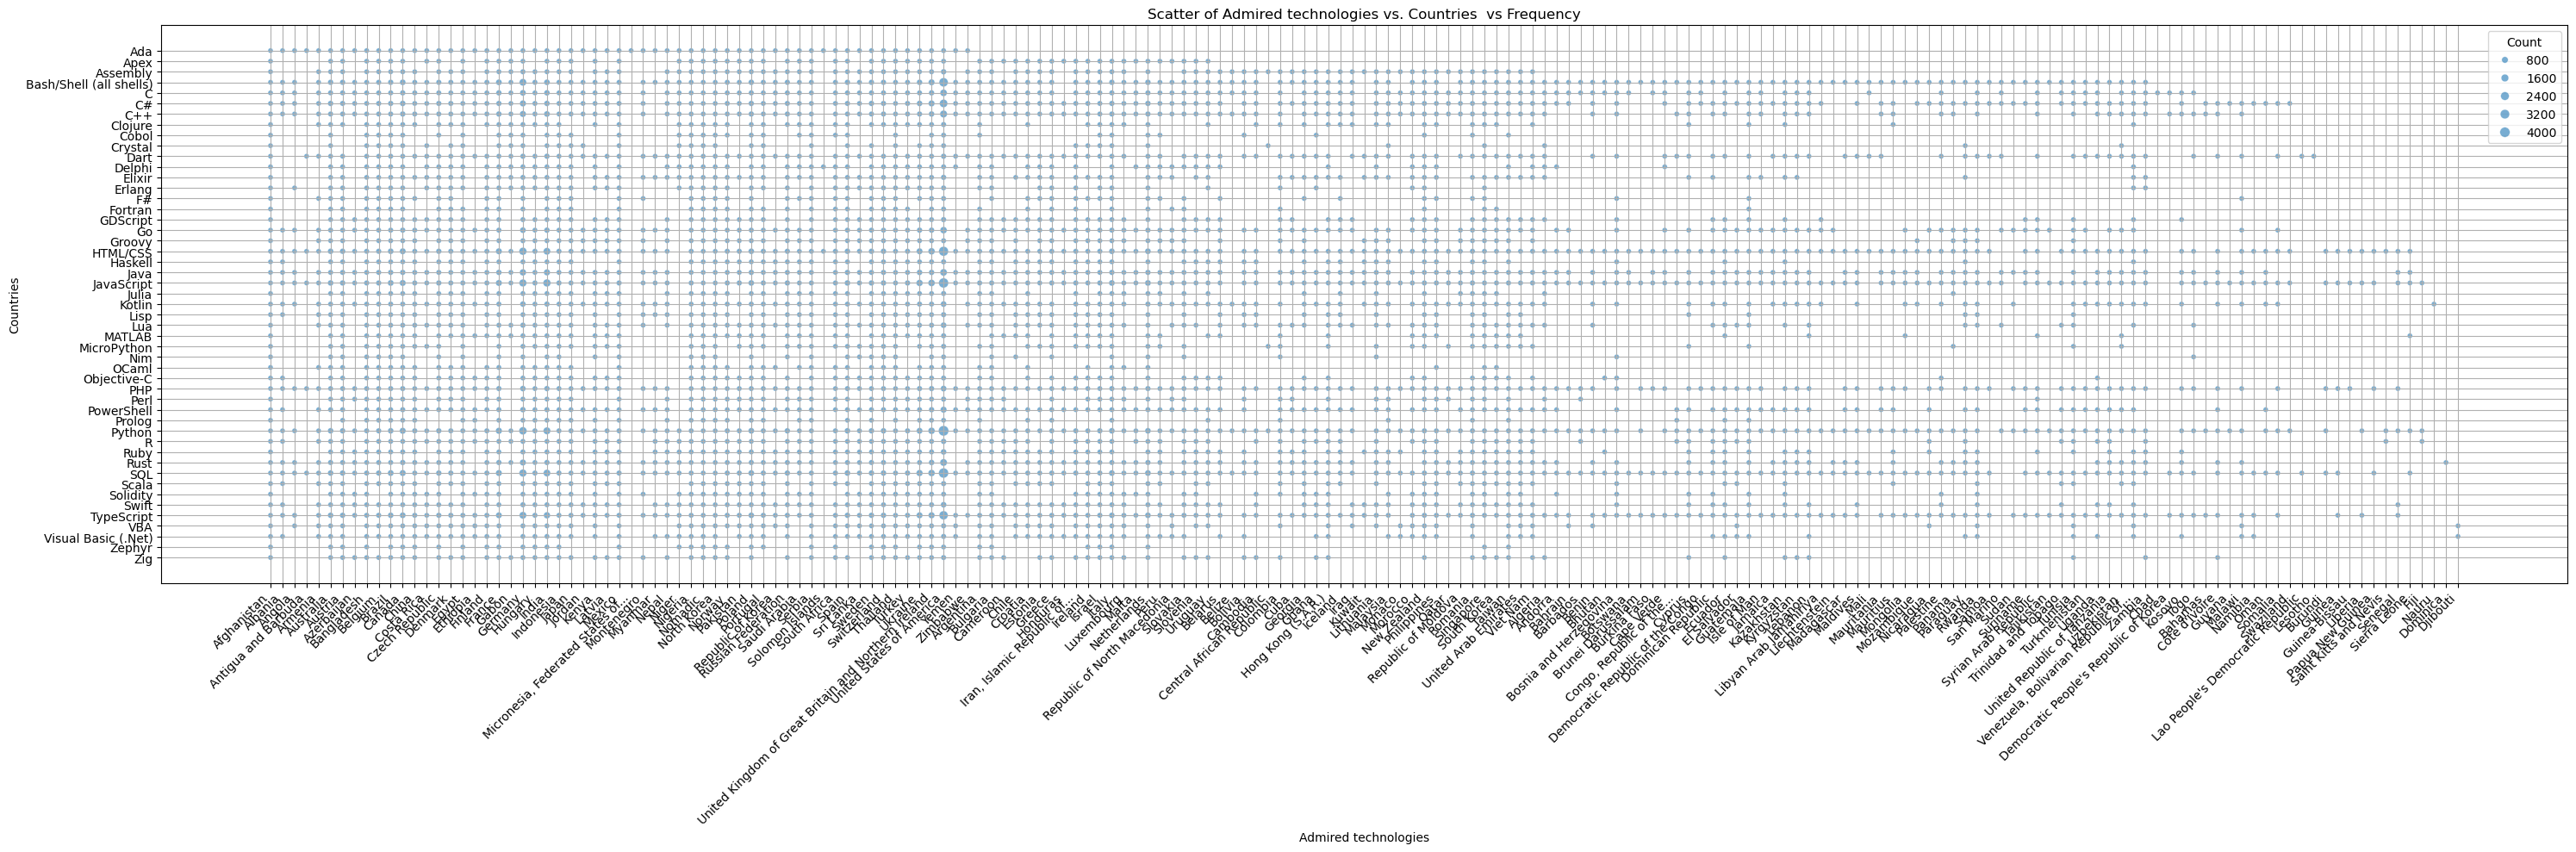

In [41]:
# X = LanguageAdmired
# Y = Country
# size = frequency of admiration
import seaborn as sns

# Drop rows where WebframeWantToWorkWith is NaN
df_clean = df.dropna(subset=['LanguageAdmired']).copy()

# Convert semicolon-separated strings to lists
df_clean['Lang_adm'] = df_clean['LanguageAdmired'].str.split(';')

# Explode the lists into individual rows and reset index
df_clean = df_clean.explode('Lang_adm').reset_index(drop=True)

# Strip whitespace
df_clean['Lang_adm'] = df_clean['Lang_adm'].str.strip()

# Optional: drop rows with missing Job Sat(to prevent plot issues)
df_clean = df_clean.dropna(subset=['Country'])


# Group by Web Frames and Job sat to count frequency
Counts = df_clean.groupby(['Lang_adm', 'Country']).size().reset_index(name='Count')

# language_age_counts.head()

# Plot
plt.figure(figsize=(30, 10))
sns.scatterplot(data=Counts, x='Country', y='Lang_adm', size ='Count', alpha=0.6)

plt.title("Scatter of Admired technologies vs. Countries  vs Frequency")
plt.xlabel("Admired technologies")
plt.ylabel("Countries")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()




## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
